# Comparison between water Temperature and Chlorophyll-a

First, we install and load the necessary packages.

In [ ]:
install.packages(c("dplyr","raster","sdmpredictors"), repos = "http://cran.us.r-project.org")

In [18]:
library(dplyr)
library(raster)
library(sdmpredictors)

Then, we load worldwide maps of mean temperature and chlorofill concentration at sea surface

In [19]:
temp_r <- sdmpredictors::load_layers("BO2_tempmean_ss") 
chl_r <- sdmpredictors::load_layers("BO2_chlomean_ss")

Warning message in get_datadir(datadir):
"file.path(tempdir(), "sdmpredictors") will be used as datadir, set options(sdmpredictors_datadir="<directory>") to avoid re-downloading the data in every session or set the datadir parameter in load_layers"Warning message in get_datadir(datadir):
"file.path(tempdir(), "sdmpredictors") will be used as datadir, set options(sdmpredictors_datadir="<directory>") to avoid re-downloading the data in every session or set the datadir parameter in load_layers"

For each one of both maps, we select a small part of the worldwide map and we reduce the resolution to ease analysis

In [20]:
temp_crop_r <- raster::crop(temp_r,extent(-5,5,40,50))%>%  aggregate(2)
chl_res_r <- raster::crop(chl_r,extent(-5,5,40,50))%>%  aggregate(2) 

Now, we plot both resulting maps to compare their patterns.

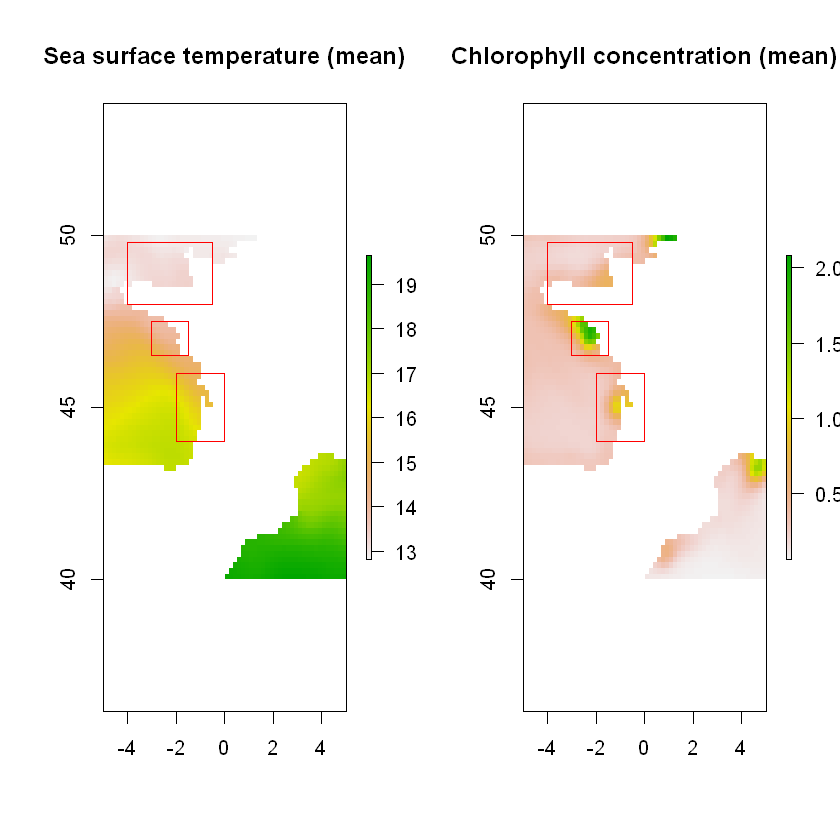

In [21]:
par(mfrow=c(1,2))
plot(temp_crop_r[[1]], main='Sea surface temperature (mean)')
# rect(0,40.2,2,41.7,border='red')
rect(-3,46.5,-1.5,47.5,border='red')
rect(-2,44,-0,46,border='red')
rect(-4,48,-0.5,49.8,border='red')

plot(chl_res_r[[1]],main='Chlorophyll concentration (mean)')
# rect(0,40.2,2,41.7,border='red')
rect(-3,46.5,-1.5,47.5,border='red')
rect(-2,44,-0,46,border='red')
rect(-4,48,-0.5,49.8,border='red')

Red rectangles mark interesting regions were patterns like correlated increase/decrease or inverse correaltions seem to appear. This kind of effects can be related to different kind of algae present at sea.

Now, we analyze the local correlation between both maps and perform correlation tests to see regions with significant positive or negative correlation between both maps.

In [22]:
cor_result <- raster::corLocal(temp_crop_r, chl_res_r, test=TRUE )

Last, we analyze the results.

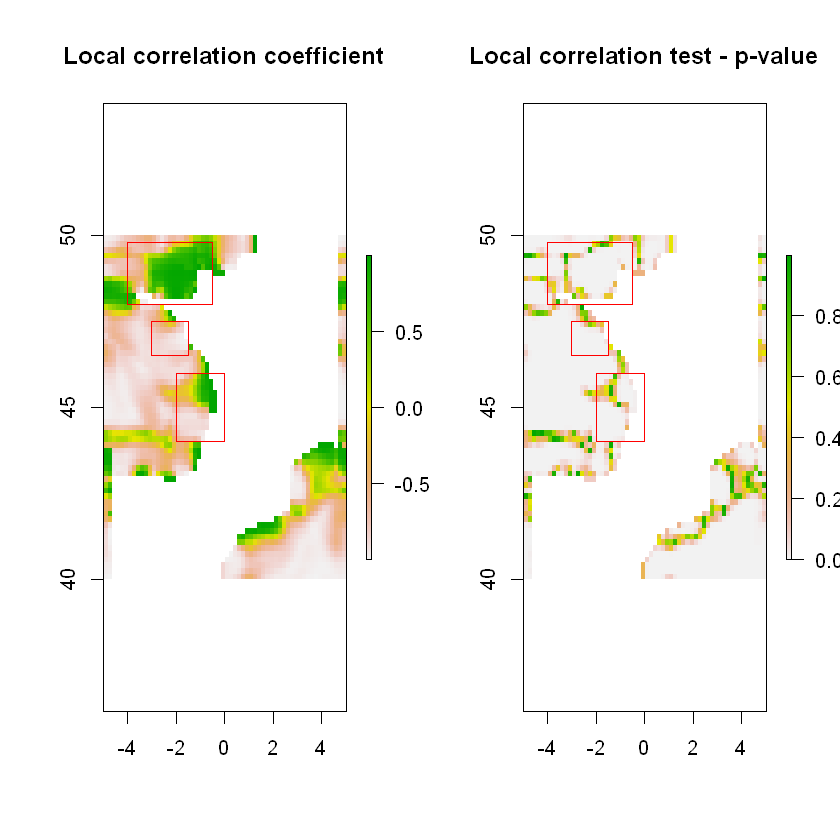

In [23]:
par(mfrow=c(1,2))
plot(cor_result[[1]],main="Local correlation coefficient")
# rect(0,40.2,2,41.7,border='red')
rect(-3,46.5,-1.5,47.5,border='red')
rect(-2,44,-0,46,border='red')
rect(-4,48,-0.5,49.8,border='red')
plot(cor_result[[2]],main="Local correlation test - p-value")
# rect(0,40.2,2,41.7,border='red')
rect(-3,46.5,-1.5,47.5,border='red')
rect(-2,44,-0,46,border='red')
rect(-4,48,-0.5,49.8,border='red')